In [1]:
from tensorflow.keras.models import load_model
model = load_model(r"C:/Users/hp/best_model_finetuned.h5")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
IMG_SIZE = 224
BATCH_SIZE = 32
CATEGORIES = ['Open', 'Closed']  # binary

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
test_dir  = r"C:/Users/hp/OneDrive/Desktop/PGA38/eye open close/test"

In [11]:
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 6991 images belonging to 2 classes.


In [13]:
loss, acc = model.evaluate(test_gen)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


219/219 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.9930 - loss: 0.0202


219/219 ━━━━━━━━━━━━━━━━━━━━ 166s 750ms/step


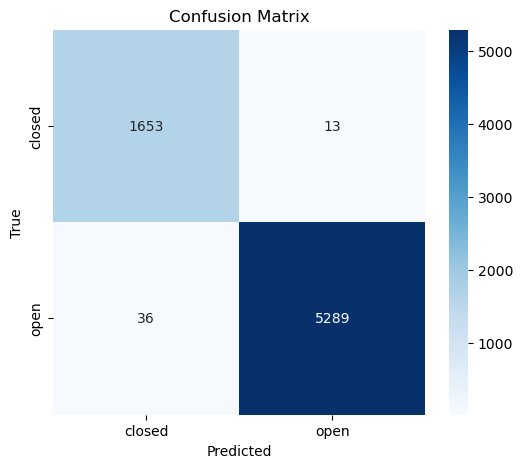


Classification Report:

              precision    recall  f1-score   support

      closed       0.98      0.99      0.99      1666
        open       1.00      0.99      1.00      5325

    accuracy                           0.99      6991
   macro avg       0.99      0.99      0.99      6991
weighted avg       0.99      0.99      0.99      6991



In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predictions for test set
preds = model.predict(test_gen)
y_pred = (preds > 0.5).astype("int32")  # convert probability → class (0/1)
y_true = test_gen.classes               # true labels
class_labels = list(test_gen.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))